<a href="https://colab.research.google.com/github/tcsprojects-puc/analise-dados/blob/master/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise de Dados - Covid-19**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1310076701
#O dataset contém dados de pessoas que contraíram o covid-19 no Canada. Ele contém 3098 casos do total de 8591 registrados entre 26/01 a 31/03. 
#As variáveis analisadas foram: Gênero, Faixa Etária, Tipo de transmissão e Hospitalização.

dataset = pd.read_csv('/content/drive/My Drive/Covid/corona.csv', sep=';')

#Mapeando valoroes
dataset['Gender'] = dataset['Gender'].map({1: 'Male', 2: 'Female', 3: 'Other', 7: 'Unknown', 9: 'Not stated' })
dataset['Age group'] = dataset['Age group'].map({1: '0 a 19', 2: '20 a 39', 3: '40 a 49', 4: '50 a 59', 5: '60 a 69', 6: '70 a 79', 7: '80+', 9: 'Not stated' })
dataset['Transmission'] = dataset['Transmission'].map({1: 'Travel', 2: 'Community', 3: 'Pending'})
dataset['Hospitalization'] = dataset['Hospitalization'].map({1: 'Yes', 2: 'No', 7: 'Unknown', 9: 'Not Stated'})

**Estrutura do dataset**

In [0]:
# Exibe as 5 primerias linhas
dataset.head()

,ID,Period,Gender,Age group,Transmission,Hospitalization,Intensive,Status
0,1,2020,Female,20 a 39,Community,Unknown,9,9
1,2,2020,Male,60 a 69,Community,Unknown,9,9
2,3,2020,Female,20 a 39,Community,Unknown,9,9
3,4,2020,Female,20 a 39,Community,Unknown,9,9
4,5,2020,Female,20 a 39,Community,Unknown,9,9


**Histograma - Geral x Faixa Etária**

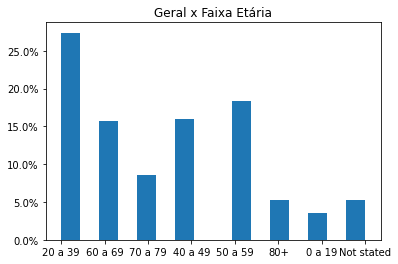

In [0]:
age_group = dataset['Age group']

plt.title('Geral x Faixa Etária')
plt.hist(age_group, weights=np.ones(len(age_group)) / len(age_group), bins=16)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [0]:
#Geral x Idade
age_group = dataset['Age group']
age_group_count = age_group.value_counts()
age_group_count.apply(lambda x: x * 100 / float(age_group.count())).sort_values()

0 a 19         3.588749
Not stated     5.205302
80+            5.237633
70 a 79        8.503071
60 a 69       15.680569
40 a 49       16.036211
50 a 59       18.364048
20 a 39       27.384416
Name: Age group, dtype: float64

**Histograma - Geral x Gênero**

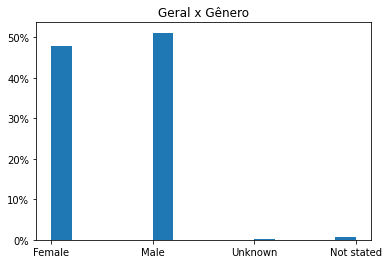

In [0]:
#Geral x Gênero
gender = dataset['Gender']
plt.title('Geral x Gênero')
plt.hist(gender, weights=np.ones(len(gender)) / len(gender), bins=15)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [0]:
gender = dataset['Gender']
gender_count = gender.value_counts()
gender_count.apply(lambda x: x * 100 / float(gender.count())).sort_values()

Unknown        0.290980
Not stated     0.743615
Female        47.785322
Male          51.180084
Name: Gender, dtype: float64

**Masculino x Idade**

In [0]:
#Masculino x Idade
male = dataset.loc[dataset['Gender'] == 'Male']
male_age = male['Age group']
male_age_count = male_age.value_counts()
male_age_count.apply(lambda x: x * 100 / float(male_age.count())).sort_values()

0 a 19         4.042956
80+            4.927353
Not stated     5.369551
70 a 79        8.780796
60 a 69       15.982312
50 a 59       16.993051
40 a 49       18.066961
20 a 39       25.837018
Name: Age group, dtype: float64

**Feminio x Idade**

In [0]:
#Feminio x Idade
female = dataset.loc[dataset['Gender'] == 'Female']

female_age = female['Age group']
female_age_count = female_age.value_counts()
female_age_count.apply(lambda x: x * 100 / float(female_age.count())).sort_values()

0 a 19         3.112314
Not stated     4.397835
80+            5.615697
70 a 79        8.322057
40 a 49       14.005413
60 a 69       15.493911
50 a 59       19.891746
20 a 39       29.161028
Name: Age group, dtype: float64

**Transmissão**

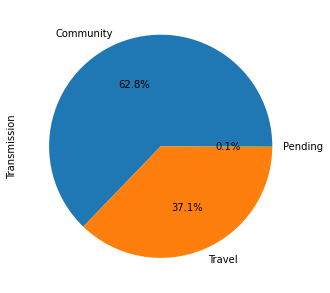

In [0]:
plt.figure(figsize=(5,10))
transmission = dataset['Transmission']
transmission.value_counts().plot.pie(autopct='%1.1f%%')

**Hospitalização**

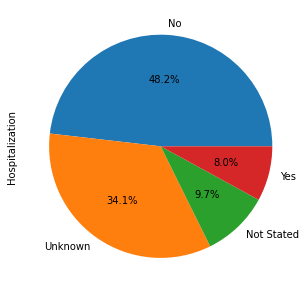

In [0]:
plt.figure(figsize=(5,10))
hospitalization = dataset['Hospitalization']
hospitalization.value_counts().plot.pie(autopct='%1.1f%%')